In [22]:
from datetime import date
import yfinance as yf
from pandas_datareader.data import DataReader

#need to import os so we can query the environment for the appropriate data director
import os

import pandas as pd
#needed to handle timestamp functionality with timezones
import pytz

#alpha model1 is a simple signal generator that emits constant forecasts irrespective of market behavior for a particular 
#collection of assets
from qstrader.alpha_model.fixed_signals import FixedSignalsAlphaModel

#equity tells the model the data from CSV files represent equity prices/volumes
from qstrader.asset.equity import Equity

#static universe tells the model we won't be changing the assets used over time
from qstrader.asset.universe.static import StaticUniverse

#this tells the model how our asset universe specification and data sources are linked
from qstrader.data.backtest_data_handler import BacktestDataHandler

#tells the model our datasource is from CSV files
from qstrader.data.daily_bar_csv import CSVDailyBarDataSource

#this is for the performance breakdown stats
from qstrader.statistics.tearsheet import TearsheetStatistics

#this runs our backtest engine over the specified start and enddates
from qstrader.trading.backtest import BacktestTradingSession

In [23]:
#IMPORT AGG
start = date(1993, 2, 8)
AGG = DataReader('AGG', 'yahoo', start=start)

In [24]:
#GET AGG RETURNS
Agg_ret = AGG.reset_index()
Agg_ret["Returns"] = Agg_ret['Adj Close'].pct_change()
Agg_ret.dropna(inplace=True)
Agg_ret.to_csv('AGG.csv')

In [25]:
if __name__ == "__main__":
    start_dt = pd.Timestamp('2003-09-30 14:30:00', tz=pytz.UTC)
    end_dt = pd.Timestamp('2022-03-31 23:59:00', tz=pytz.UTC)

In [26]:
# Construct the symbols and assets necessary for the backtest
strategy_symbols = ['SPY', 'AGG']
strategy_assets = ['EQ:%s' % symbol for symbol in strategy_symbols]
strategy_universe = StaticUniverse(strategy_assets)


In [27]:
# To avoid loading all CSV files in the directory, set the
# data source to load only those provided symbols
csv_dir = os.environ.get('QSTRADER_CSV_DATA_DIR', '.')
data_source = CSVDailyBarDataSource(csv_dir, Equity, csv_symbols=strategy_symbols)
data_handler = BacktestDataHandler(strategy_universe, data_sources=[data_source])

Loading CSV files into DataFrames...
Loading CSV file for symbol 'EQ:SPY'...
Loading CSV file for symbol 'EQ:AGG'...
Adjusting pricing in CSV files...
Adjusting CSV file for symbol 'EQ:SPY'...
Adjusting CSV file for symbol 'EQ:AGG'...


In [28]:
# Construct an Alpha Model that simply provides
# static allocations to a universe of assets
# In this case 60% SPY ETF, 40% AGG ETF,
# rebalanced at the end of each month
strategy_alpha_model = FixedSignalsAlphaModel({'EQ:SPY': 0.6, 'EQ:AGG': 0.4})
strategy_backtest = BacktestTradingSession(
    start_dt,
    end_dt,
    strategy_universe,
    strategy_alpha_model,
    rebalance='end_of_month',
    long_only=True,
    cash_buffer_percentage=0.01,
    data_handler=data_handler
)
strategy_backtest.run()


Initialising simulated broker "Backtest Simulated Broker Account"...
(2003-09-30 14:30:00+00:00) - portfolio creation: Portfolio "000001" created at broker "Backtest Simulated Broker Account"
(2003-09-30 14:30:00+00:00) - subscription: 1000000.00 subscribed to portfolio "000001"
Beginning backtest simulation...
(2003-09-30 14:30:00+00:00) - market_open
(2003-09-30 21:00:00+00:00) - market_close
(2003-09-30 21:00:00+00:00) - trading logic and rebalance
(2003-09-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2003-09-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: 6921
(2003-09-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: 8512
(2003-10-01 14:30:00+00:00) - market_open
(2003-10-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 6921, price: 57.18, consideration: 395730.00, commission: 0.00, total: 395730.00
(2003-10-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 8512, price: 69.99, consideration: 595720.00, commission: 0.00, total: 595720.00
(2003-10-01 21:

C:\Users\bng19\anaconda3_64bit\envs\QuantitativeTrading\lib\site-packages\qstrader\data\daily_bar_csv.py:243: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  ask = bid_ask_df.iloc[bid_ask_df.index.get_loc(dt, method='pad')]['Ask']
C:\Users\bng19\anaconda3_64bit\envs\QuantitativeTrading\lib\site-packages\qstrader\data\daily_bar_csv.py:219: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  bid = bid_ask_df.iloc[bid_ask_df.index.get_loc(dt, method='pad')]['Bid']


(2003-10-03 21:00:00+00:00) - market_close
(2003-10-06 14:30:00+00:00) - market_open
(2003-10-06 21:00:00+00:00) - market_close
(2003-10-07 14:30:00+00:00) - market_open
(2003-10-07 21:00:00+00:00) - market_close
(2003-10-08 14:30:00+00:00) - market_open
(2003-10-08 21:00:00+00:00) - market_close
(2003-10-09 14:30:00+00:00) - market_open
(2003-10-09 21:00:00+00:00) - market_close
(2003-10-10 14:30:00+00:00) - market_open
(2003-10-10 21:00:00+00:00) - market_close
(2003-10-13 14:30:00+00:00) - market_open
(2003-10-13 21:00:00+00:00) - market_close
(2003-10-14 14:30:00+00:00) - market_open
(2003-10-14 21:00:00+00:00) - market_close
(2003-10-15 14:30:00+00:00) - market_open
(2003-10-15 21:00:00+00:00) - market_close
(2003-10-16 14:30:00+00:00) - market_open
(2003-10-16 21:00:00+00:00) - market_close
(2003-10-17 14:30:00+00:00) - market_open
(2003-10-17 21:00:00+00:00) - market_close
(2003-10-20 14:30:00+00:00) - market_open
(2003-10-20 21:00:00+00:00) - market_close
(2003-10-21 14:30:00+0

(2004-01-22 14:30:00+00:00) - market_open
(2004-01-22 21:00:00+00:00) - market_close
(2004-01-23 14:30:00+00:00) - market_open
(2004-01-23 21:00:00+00:00) - market_close
(2004-01-26 14:30:00+00:00) - market_open
(2004-01-26 21:00:00+00:00) - market_close
(2004-01-27 14:30:00+00:00) - market_open
(2004-01-27 21:00:00+00:00) - market_close
(2004-01-28 14:30:00+00:00) - market_open
(2004-01-28 21:00:00+00:00) - market_close
(2004-01-29 14:30:00+00:00) - market_open
(2004-01-29 21:00:00+00:00) - market_close
(2004-01-30 14:30:00+00:00) - market_open
(2004-01-30 21:00:00+00:00) - market_close
(2004-01-30 21:00:00+00:00) - trading logic and rebalance
(2004-01-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2004-01-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: 67
(2004-01-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: -50.0
(2004-02-02 14:30:00+00:00) - market_open
(2004-02-02 14:30:00+00:00) - executed order: EQ:SPY, qty: -50.0, price: 79.76, consideration: -398

(2004-05-06 21:00:00+00:00) - market_close
(2004-05-07 14:30:00+00:00) - market_open
(2004-05-07 21:00:00+00:00) - market_close
(2004-05-10 14:30:00+00:00) - market_open
(2004-05-10 21:00:00+00:00) - market_close
(2004-05-11 14:30:00+00:00) - market_open
(2004-05-11 21:00:00+00:00) - market_close
(2004-05-12 14:30:00+00:00) - market_open
(2004-05-12 21:00:00+00:00) - market_close
(2004-05-13 14:30:00+00:00) - market_open
(2004-05-13 21:00:00+00:00) - market_close
(2004-05-14 14:30:00+00:00) - market_open
(2004-05-14 21:00:00+00:00) - market_close
(2004-05-17 14:30:00+00:00) - market_open
(2004-05-17 21:00:00+00:00) - market_close
(2004-05-18 14:30:00+00:00) - market_open
(2004-05-18 21:00:00+00:00) - market_close
(2004-05-19 14:30:00+00:00) - market_open
(2004-05-19 21:00:00+00:00) - market_close
(2004-05-20 14:30:00+00:00) - market_open
(2004-05-20 21:00:00+00:00) - market_close
(2004-05-21 14:30:00+00:00) - market_open
(2004-05-21 21:00:00+00:00) - market_close
(2004-05-24 14:30:00+0

(2004-08-25 14:30:00+00:00) - market_open
(2004-08-25 21:00:00+00:00) - market_close
(2004-08-26 14:30:00+00:00) - market_open
(2004-08-26 21:00:00+00:00) - market_close
(2004-08-27 14:30:00+00:00) - market_open
(2004-08-27 21:00:00+00:00) - market_close
(2004-08-30 14:30:00+00:00) - market_open
(2004-08-30 21:00:00+00:00) - market_close
(2004-08-31 14:30:00+00:00) - market_open
(2004-08-31 21:00:00+00:00) - market_close
(2004-08-31 21:00:00+00:00) - trading logic and rebalance
(2004-08-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2004-08-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: -59.0
(2004-08-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: 45.0
(2004-09-01 14:30:00+00:00) - market_open
(2004-09-01 14:30:00+00:00) - executed order: EQ:AGG, qty: -59.0, price: 58.85, consideration: -3472.00, commission: 0.00, total: -3472.00
(2004-09-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 45.0, price: 78.39, consideration: 3527.00, commission: 0.00, total: 

(2004-12-07 21:00:00+00:00) - market_close
(2004-12-08 14:30:00+00:00) - market_open
(2004-12-08 21:00:00+00:00) - market_close
(2004-12-09 14:30:00+00:00) - market_open
(2004-12-09 21:00:00+00:00) - market_close
(2004-12-10 14:30:00+00:00) - market_open
(2004-12-10 21:00:00+00:00) - market_close
(2004-12-13 14:30:00+00:00) - market_open
(2004-12-13 21:00:00+00:00) - market_close
(2004-12-14 14:30:00+00:00) - market_open
(2004-12-14 21:00:00+00:00) - market_close
(2004-12-15 14:30:00+00:00) - market_open
(2004-12-15 21:00:00+00:00) - market_close
(2004-12-16 14:30:00+00:00) - market_open
(2004-12-16 21:00:00+00:00) - market_close
(2004-12-17 14:30:00+00:00) - market_open
(2004-12-17 21:00:00+00:00) - market_close
(2004-12-20 14:30:00+00:00) - market_open
(2004-12-20 21:00:00+00:00) - market_close
(2004-12-21 14:30:00+00:00) - market_open
(2004-12-21 21:00:00+00:00) - market_close
(2004-12-22 14:30:00+00:00) - market_open
(2004-12-22 21:00:00+00:00) - market_close
(2004-12-23 14:30:00+0

(2005-03-29 14:30:00+00:00) - market_open
(2005-03-29 21:00:00+00:00) - market_close
(2005-03-30 14:30:00+00:00) - market_open
(2005-03-30 21:00:00+00:00) - market_close
(2005-03-31 14:30:00+00:00) - market_open
(2005-03-31 21:00:00+00:00) - market_close
(2005-03-31 21:00:00+00:00) - trading logic and rebalance
(2005-03-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2005-03-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: -38.0
(2005-03-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: 29.0
(2005-04-01 14:30:00+00:00) - market_open
(2005-04-01 14:30:00+00:00) - executed order: EQ:AGG, qty: -38.0, price: 59.47, consideration: -2260.00, commission: 0.00, total: -2260.00
(2005-04-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 29.0, price: 85.14, consideration: 2469.00, commission: 0.00, total: 2469.00
(2005-04-01 21:00:00+00:00) - market_close
(2005-04-04 14:30:00+00:00) - market_open
(2005-04-04 21:00:00+00:00) - market_close
(2005-04-05 14:30:00+00:00) - mark

(2005-07-08 14:30:00+00:00) - market_open
(2005-07-08 21:00:00+00:00) - market_close
(2005-07-11 14:30:00+00:00) - market_open
(2005-07-11 21:00:00+00:00) - market_close
(2005-07-12 14:30:00+00:00) - market_open
(2005-07-12 21:00:00+00:00) - market_close
(2005-07-13 14:30:00+00:00) - market_open
(2005-07-13 21:00:00+00:00) - market_close
(2005-07-14 14:30:00+00:00) - market_open
(2005-07-14 21:00:00+00:00) - market_close
(2005-07-15 14:30:00+00:00) - market_open
(2005-07-15 21:00:00+00:00) - market_close
(2005-07-18 14:30:00+00:00) - market_open
(2005-07-18 21:00:00+00:00) - market_close
(2005-07-19 14:30:00+00:00) - market_open
(2005-07-19 21:00:00+00:00) - market_close
(2005-07-20 14:30:00+00:00) - market_open
(2005-07-20 21:00:00+00:00) - market_close
(2005-07-21 14:30:00+00:00) - market_open
(2005-07-21 21:00:00+00:00) - market_close
(2005-07-22 14:30:00+00:00) - market_open
(2005-07-22 21:00:00+00:00) - market_close
(2005-07-25 14:30:00+00:00) - market_open
(2005-07-25 21:00:00+00

(2005-10-31 21:00:00+00:00) - market_close
(2005-10-31 21:00:00+00:00) - trading logic and rebalance
(2005-10-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2005-10-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: -63.0
(2005-10-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: 46.0
(2005-11-01 14:30:00+00:00) - market_open
(2005-11-01 14:30:00+00:00) - executed order: EQ:AGG, qty: -63.0, price: 60.18, consideration: -3791.00, commission: 0.00, total: -3791.00
(2005-11-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 46.0, price: 87.26, consideration: 4014.00, commission: 0.00, total: 4014.00
(2005-11-01 21:00:00+00:00) - market_close
(2005-11-02 14:30:00+00:00) - market_open
(2005-11-02 21:00:00+00:00) - market_close
(2005-11-03 14:30:00+00:00) - market_open
(2005-11-03 21:00:00+00:00) - market_close
(2005-11-04 14:30:00+00:00) - market_open
(2005-11-04 21:00:00+00:00) - market_close
(2005-11-07 14:30:00+00:00) - market_open
(2005-11-07 21:00:00+00:00) - mark

(2006-02-14 14:30:00+00:00) - market_open
(2006-02-14 21:00:00+00:00) - market_close
(2006-02-15 14:30:00+00:00) - market_open
(2006-02-15 21:00:00+00:00) - market_close
(2006-02-16 14:30:00+00:00) - market_open
(2006-02-16 21:00:00+00:00) - market_close
(2006-02-17 14:30:00+00:00) - market_open
(2006-02-17 21:00:00+00:00) - market_close
(2006-02-20 14:30:00+00:00) - market_open
(2006-02-20 21:00:00+00:00) - market_close
(2006-02-21 14:30:00+00:00) - market_open
(2006-02-21 21:00:00+00:00) - market_close
(2006-02-22 14:30:00+00:00) - market_open
(2006-02-22 21:00:00+00:00) - market_close
(2006-02-23 14:30:00+00:00) - market_open
(2006-02-23 21:00:00+00:00) - market_close
(2006-02-24 14:30:00+00:00) - market_open
(2006-02-24 21:00:00+00:00) - market_close
(2006-02-27 14:30:00+00:00) - market_open
(2006-02-27 21:00:00+00:00) - market_close
(2006-02-28 14:30:00+00:00) - market_open
(2006-02-28 21:00:00+00:00) - market_close
(2006-02-28 21:00:00+00:00) - trading logic and rebalance
(2006-0

(2006-06-06 14:30:00+00:00) - market_open
(2006-06-06 21:00:00+00:00) - market_close
(2006-06-07 14:30:00+00:00) - market_open
(2006-06-07 21:00:00+00:00) - market_close
(2006-06-08 14:30:00+00:00) - market_open
(2006-06-08 21:00:00+00:00) - market_close
(2006-06-09 14:30:00+00:00) - market_open
(2006-06-09 21:00:00+00:00) - market_close
(2006-06-12 14:30:00+00:00) - market_open
(2006-06-12 21:00:00+00:00) - market_close
(2006-06-13 14:30:00+00:00) - market_open
(2006-06-13 21:00:00+00:00) - market_close
(2006-06-14 14:30:00+00:00) - market_open
(2006-06-14 21:00:00+00:00) - market_close
(2006-06-15 14:30:00+00:00) - market_open
(2006-06-15 21:00:00+00:00) - market_close
(2006-06-16 14:30:00+00:00) - market_open
(2006-06-16 21:00:00+00:00) - market_close
(2006-06-19 14:30:00+00:00) - market_open
(2006-06-19 21:00:00+00:00) - market_close
(2006-06-20 14:30:00+00:00) - market_open
(2006-06-20 21:00:00+00:00) - market_close
(2006-06-21 14:30:00+00:00) - market_open
(2006-06-21 21:00:00+00

(2006-09-22 21:00:00+00:00) - market_close
(2006-09-25 14:30:00+00:00) - market_open
(2006-09-25 21:00:00+00:00) - market_close
(2006-09-26 14:30:00+00:00) - market_open
(2006-09-26 21:00:00+00:00) - market_close
(2006-09-27 14:30:00+00:00) - market_open
(2006-09-27 21:00:00+00:00) - market_close
(2006-09-28 14:30:00+00:00) - market_open
(2006-09-28 21:00:00+00:00) - market_close
(2006-09-29 14:30:00+00:00) - market_open
(2006-09-29 21:00:00+00:00) - market_close
(2006-09-29 21:00:00+00:00) - trading logic and rebalance
(2006-09-29 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2006-09-29 21:00:00+00:00) - submitted order: EQ:AGG, qty: 79.0
(2006-09-29 21:00:00+00:00) - submitted order: EQ:SPY, qty: -53.0
(2006-10-02 14:30:00+00:00) - market_open
(2006-10-02 14:30:00+00:00) - executed order: EQ:SPY, qty: -53.0, price: 98.40, consideration: -5215.00, commission: 0.00, total: -5215.00
(2006-10-02 14:30:00+00:00) - executed order: EQ:AGG, qty: 79.0, price: 62.60, consid

(2007-01-08 14:30:00+00:00) - market_open
(2007-01-08 21:00:00+00:00) - market_close
(2007-01-09 14:30:00+00:00) - market_open
(2007-01-09 21:00:00+00:00) - market_close
(2007-01-10 14:30:00+00:00) - market_open
(2007-01-10 21:00:00+00:00) - market_close
(2007-01-11 14:30:00+00:00) - market_open
(2007-01-11 21:00:00+00:00) - market_close
(2007-01-12 14:30:00+00:00) - market_open
(2007-01-12 21:00:00+00:00) - market_close
(2007-01-15 14:30:00+00:00) - market_open
(2007-01-15 21:00:00+00:00) - market_close
(2007-01-16 14:30:00+00:00) - market_open
(2007-01-16 21:00:00+00:00) - market_close
(2007-01-17 14:30:00+00:00) - market_open
(2007-01-17 21:00:00+00:00) - market_close
(2007-01-18 14:30:00+00:00) - market_open
(2007-01-18 21:00:00+00:00) - market_close
(2007-01-19 14:30:00+00:00) - market_open
(2007-01-19 21:00:00+00:00) - market_close
(2007-01-22 14:30:00+00:00) - market_open
(2007-01-22 21:00:00+00:00) - market_close
(2007-01-23 14:30:00+00:00) - market_open
(2007-01-23 21:00:00+00

(2007-04-30 21:00:00+00:00) - market_close
(2007-04-30 21:00:00+00:00) - trading logic and rebalance
(2007-04-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2007-04-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: 188.0
(2007-04-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: -113.0
(2007-05-01 14:30:00+00:00) - market_open
(2007-05-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -113.0, price: 110.41, consideration: -12477.00, commission: 0.00, total: -12477.00
(2007-05-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 188.0, price: 64.51, consideration: 12127.00, commission: 0.00, total: 12127.00
(2007-05-01 21:00:00+00:00) - market_close
(2007-05-02 14:30:00+00:00) - market_open
(2007-05-02 21:00:00+00:00) - market_close
(2007-05-03 14:30:00+00:00) - market_open
(2007-05-03 21:00:00+00:00) - market_close
(2007-05-04 14:30:00+00:00) - market_open
(2007-05-04 21:00:00+00:00) - market_close
(2007-05-07 14:30:00+00:00) - market_open
(2007-05-07 21:00:00+00:0

(2007-08-07 21:00:00+00:00) - market_close
(2007-08-08 14:30:00+00:00) - market_open
(2007-08-08 21:00:00+00:00) - market_close
(2007-08-09 14:30:00+00:00) - market_open
(2007-08-09 21:00:00+00:00) - market_close
(2007-08-10 14:30:00+00:00) - market_open
(2007-08-10 21:00:00+00:00) - market_close
(2007-08-13 14:30:00+00:00) - market_open
(2007-08-13 21:00:00+00:00) - market_close
(2007-08-14 14:30:00+00:00) - market_open
(2007-08-14 21:00:00+00:00) - market_close
(2007-08-15 14:30:00+00:00) - market_open
(2007-08-15 21:00:00+00:00) - market_close
(2007-08-16 14:30:00+00:00) - market_open
(2007-08-16 21:00:00+00:00) - market_close
(2007-08-17 14:30:00+00:00) - market_open
(2007-08-17 21:00:00+00:00) - market_close
(2007-08-20 14:30:00+00:00) - market_open
(2007-08-20 21:00:00+00:00) - market_close
(2007-08-21 14:30:00+00:00) - market_open
(2007-08-21 21:00:00+00:00) - market_close
(2007-08-22 14:30:00+00:00) - market_open
(2007-08-22 21:00:00+00:00) - market_close
(2007-08-23 14:30:00+0

(2007-11-27 21:00:00+00:00) - market_close
(2007-11-28 14:30:00+00:00) - market_open
(2007-11-28 21:00:00+00:00) - market_close
(2007-11-29 14:30:00+00:00) - market_open
(2007-11-29 21:00:00+00:00) - market_close
(2007-11-30 14:30:00+00:00) - market_open
(2007-11-30 21:00:00+00:00) - market_close
(2007-11-30 21:00:00+00:00) - trading logic and rebalance
(2007-11-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2007-11-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: -286.0
(2007-11-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: 175.0
(2007-12-03 14:30:00+00:00) - market_open
(2007-12-03 14:30:00+00:00) - executed order: EQ:AGG, qty: -286.0, price: 67.71, consideration: -19364.00, commission: 0.00, total: -19364.00
(2007-12-03 14:30:00+00:00) - executed order: EQ:SPY, qty: 175.0, price: 111.24, consideration: 19467.00, commission: 0.00, total: 19467.00
(2007-12-03 21:00:00+00:00) - market_close
(2007-12-04 14:30:00+00:00) - market_open
(2007-12-04 21:00:00+00:0

(2008-03-05 21:00:00+00:00) - market_close
(2008-03-06 14:30:00+00:00) - market_open
(2008-03-06 21:00:00+00:00) - market_close
(2008-03-07 14:30:00+00:00) - market_open
(2008-03-07 21:00:00+00:00) - market_close
(2008-03-10 14:30:00+00:00) - market_open
(2008-03-10 21:00:00+00:00) - market_close
(2008-03-11 14:30:00+00:00) - market_open
(2008-03-11 21:00:00+00:00) - market_close
(2008-03-12 14:30:00+00:00) - market_open
(2008-03-12 21:00:00+00:00) - market_close
(2008-03-13 14:30:00+00:00) - market_open
(2008-03-13 21:00:00+00:00) - market_close
(2008-03-14 14:30:00+00:00) - market_open
(2008-03-14 21:00:00+00:00) - market_close
(2008-03-17 14:30:00+00:00) - market_open
(2008-03-17 21:00:00+00:00) - market_close
(2008-03-18 14:30:00+00:00) - market_open
(2008-03-18 21:00:00+00:00) - market_close
(2008-03-19 14:30:00+00:00) - market_open
(2008-03-19 21:00:00+00:00) - market_close
(2008-03-20 14:30:00+00:00) - market_open
(2008-03-20 21:00:00+00:00) - market_close
(2008-03-21 14:30:00+0

(2008-06-23 21:00:00+00:00) - market_close
(2008-06-24 14:30:00+00:00) - market_open
(2008-06-24 21:00:00+00:00) - market_close
(2008-06-25 14:30:00+00:00) - market_open
(2008-06-25 21:00:00+00:00) - market_close
(2008-06-26 14:30:00+00:00) - market_open
(2008-06-26 21:00:00+00:00) - market_close
(2008-06-27 14:30:00+00:00) - market_open
(2008-06-27 21:00:00+00:00) - market_close
(2008-06-30 14:30:00+00:00) - market_open
(2008-06-30 21:00:00+00:00) - market_close
(2008-06-30 21:00:00+00:00) - trading logic and rebalance
(2008-06-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2008-06-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: -390.0
(2008-06-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: 280.0
(2008-07-01 14:30:00+00:00) - market_open
(2008-07-01 14:30:00+00:00) - executed order: EQ:AGG, qty: -390.0, price: 68.67, consideration: -26782.00, commission: 0.00, total: -26782.00
(2008-07-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 280.0, price: 96.43, 

(2008-10-02 14:30:00+00:00) - market_open
(2008-10-02 21:00:00+00:00) - market_close
(2008-10-03 14:30:00+00:00) - market_open
(2008-10-03 21:00:00+00:00) - market_close
(2008-10-06 14:30:00+00:00) - market_open
(2008-10-06 21:00:00+00:00) - market_close
(2008-10-07 14:30:00+00:00) - market_open
(2008-10-07 21:00:00+00:00) - market_close
(2008-10-08 14:30:00+00:00) - market_open
(2008-10-08 21:00:00+00:00) - market_close
(2008-10-09 14:30:00+00:00) - market_open
(2008-10-09 21:00:00+00:00) - market_close
(2008-10-10 14:30:00+00:00) - market_open
(2008-10-10 21:00:00+00:00) - market_close
(2008-10-13 14:30:00+00:00) - market_open
(2008-10-13 21:00:00+00:00) - market_close
(2008-10-14 14:30:00+00:00) - market_open
(2008-10-14 21:00:00+00:00) - market_close
(2008-10-15 14:30:00+00:00) - market_open
(2008-10-15 21:00:00+00:00) - market_close
(2008-10-16 14:30:00+00:00) - market_open
(2008-10-16 21:00:00+00:00) - market_close
(2008-10-17 14:30:00+00:00) - market_open
(2008-10-17 21:00:00+00

(2009-01-19 21:00:00+00:00) - market_close
(2009-01-20 14:30:00+00:00) - market_open
(2009-01-20 21:00:00+00:00) - market_close
(2009-01-21 14:30:00+00:00) - market_open
(2009-01-21 21:00:00+00:00) - market_close
(2009-01-22 14:30:00+00:00) - market_open
(2009-01-22 21:00:00+00:00) - market_close
(2009-01-23 14:30:00+00:00) - market_open
(2009-01-23 21:00:00+00:00) - market_close
(2009-01-26 14:30:00+00:00) - market_open
(2009-01-26 21:00:00+00:00) - market_close
(2009-01-27 14:30:00+00:00) - market_open
(2009-01-27 21:00:00+00:00) - market_close
(2009-01-28 14:30:00+00:00) - market_open
(2009-01-28 21:00:00+00:00) - market_close
(2009-01-29 14:30:00+00:00) - market_open
(2009-01-29 21:00:00+00:00) - market_close
(2009-01-30 14:30:00+00:00) - market_open
(2009-01-30 21:00:00+00:00) - market_close
(2009-01-30 21:00:00+00:00) - trading logic and rebalance
(2009-01-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2009-01-30 21:00:00+00:00) - submitted order: EQ:AGG, qt

(2009-05-08 14:30:00+00:00) - market_open
(2009-05-08 21:00:00+00:00) - market_close
(2009-05-11 14:30:00+00:00) - market_open
(2009-05-11 21:00:00+00:00) - market_close
(2009-05-12 14:30:00+00:00) - market_open
(2009-05-12 21:00:00+00:00) - market_close
(2009-05-13 14:30:00+00:00) - market_open
(2009-05-13 21:00:00+00:00) - market_close
(2009-05-14 14:30:00+00:00) - market_open
(2009-05-14 21:00:00+00:00) - market_close
(2009-05-15 14:30:00+00:00) - market_open
(2009-05-15 21:00:00+00:00) - market_close
(2009-05-18 14:30:00+00:00) - market_open
(2009-05-18 21:00:00+00:00) - market_close
(2009-05-19 14:30:00+00:00) - market_open
(2009-05-19 21:00:00+00:00) - market_close
(2009-05-20 14:30:00+00:00) - market_open
(2009-05-20 21:00:00+00:00) - market_close
(2009-05-21 14:30:00+00:00) - market_open
(2009-05-21 21:00:00+00:00) - market_close
(2009-05-22 14:30:00+00:00) - market_open
(2009-05-22 21:00:00+00:00) - market_close
(2009-05-25 14:30:00+00:00) - market_open
(2009-05-25 21:00:00+00

(2009-08-31 21:00:00+00:00) - market_close
(2009-08-31 21:00:00+00:00) - trading logic and rebalance
(2009-08-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2009-08-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: 94.0
(2009-08-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: -88.0
(2009-09-01 14:30:00+00:00) - market_open
(2009-09-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -88.0, price: 79.80, consideration: -7022.00, commission: 0.00, total: -7022.00
(2009-09-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 94.0, price: 74.31, consideration: 6986.00, commission: 0.00, total: 6986.00
(2009-09-01 21:00:00+00:00) - market_close
(2009-09-02 14:30:00+00:00) - market_open
(2009-09-02 21:00:00+00:00) - market_close
(2009-09-03 14:30:00+00:00) - market_open
(2009-09-03 21:00:00+00:00) - market_close
(2009-09-04 14:30:00+00:00) - market_open
(2009-09-04 21:00:00+00:00) - market_close
(2009-09-07 14:30:00+00:00) - market_open
(2009-09-07 21:00:00+00:00) - mark

(2009-12-09 21:00:00+00:00) - market_close
(2009-12-10 14:30:00+00:00) - market_open
(2009-12-10 21:00:00+00:00) - market_close
(2009-12-11 14:30:00+00:00) - market_open
(2009-12-11 21:00:00+00:00) - market_close
(2009-12-14 14:30:00+00:00) - market_open
(2009-12-14 21:00:00+00:00) - market_close
(2009-12-15 14:30:00+00:00) - market_open
(2009-12-15 21:00:00+00:00) - market_close
(2009-12-16 14:30:00+00:00) - market_open
(2009-12-16 21:00:00+00:00) - market_close
(2009-12-17 14:30:00+00:00) - market_open
(2009-12-17 21:00:00+00:00) - market_close
(2009-12-18 14:30:00+00:00) - market_open
(2009-12-18 21:00:00+00:00) - market_close
(2009-12-21 14:30:00+00:00) - market_open
(2009-12-21 21:00:00+00:00) - market_close
(2009-12-22 14:30:00+00:00) - market_open
(2009-12-22 21:00:00+00:00) - market_close
(2009-12-23 14:30:00+00:00) - market_open
(2009-12-23 21:00:00+00:00) - market_close
(2009-12-24 14:30:00+00:00) - market_open
(2009-12-24 21:00:00+00:00) - market_close
(2009-12-25 14:30:00+0

(2010-03-29 14:30:00+00:00) - market_open
(2010-03-29 21:00:00+00:00) - market_close
(2010-03-30 14:30:00+00:00) - market_open
(2010-03-30 21:00:00+00:00) - market_close
(2010-03-31 14:30:00+00:00) - market_open
(2010-03-31 21:00:00+00:00) - market_close
(2010-03-31 21:00:00+00:00) - trading logic and rebalance
(2010-03-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2010-03-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: 246.0
(2010-03-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: -207.0
(2010-04-01 14:30:00+00:00) - market_open
(2010-04-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -207.0, price: 93.53, consideration: -19360.00, commission: 0.00, total: -19360.00
(2010-04-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 246.0, price: 76.15, consideration: 18734.00, commission: 0.00, total: 18734.00
(2010-04-01 21:00:00+00:00) - market_close
(2010-04-02 14:30:00+00:00) - market_open
(2010-04-02 21:00:00+00:00) - market_close
(2010-04-05 14:30:00+00:00

(2010-07-08 14:30:00+00:00) - market_open
(2010-07-08 21:00:00+00:00) - market_close
(2010-07-09 14:30:00+00:00) - market_open
(2010-07-09 21:00:00+00:00) - market_close
(2010-07-12 14:30:00+00:00) - market_open
(2010-07-12 21:00:00+00:00) - market_close
(2010-07-13 14:30:00+00:00) - market_open
(2010-07-13 21:00:00+00:00) - market_close
(2010-07-14 14:30:00+00:00) - market_open
(2010-07-14 21:00:00+00:00) - market_close
(2010-07-15 14:30:00+00:00) - market_open
(2010-07-15 21:00:00+00:00) - market_close
(2010-07-16 14:30:00+00:00) - market_open
(2010-07-16 21:00:00+00:00) - market_close
(2010-07-19 14:30:00+00:00) - market_open
(2010-07-19 21:00:00+00:00) - market_close
(2010-07-20 14:30:00+00:00) - market_open
(2010-07-20 21:00:00+00:00) - market_close
(2010-07-21 14:30:00+00:00) - market_open
(2010-07-21 21:00:00+00:00) - market_close
(2010-07-22 14:30:00+00:00) - market_open
(2010-07-22 21:00:00+00:00) - market_close
(2010-07-23 14:30:00+00:00) - market_open
(2010-07-23 21:00:00+00

(2010-10-29 14:30:00+00:00) - market_open
(2010-10-29 21:00:00+00:00) - market_close
(2010-10-29 21:00:00+00:00) - trading logic and rebalance
(2010-10-29 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2010-10-29 21:00:00+00:00) - submitted order: EQ:AGG, qty: 148.0
(2010-10-29 21:00:00+00:00) - submitted order: EQ:SPY, qty: -127.0
(2010-11-01 14:30:00+00:00) - market_open
(2010-11-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -127.0, price: 95.50, consideration: -12128.00, commission: 0.00, total: -12128.00
(2010-11-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 148.0, price: 81.06, consideration: 11997.00, commission: 0.00, total: 11997.00
(2010-11-01 21:00:00+00:00) - market_close
(2010-11-02 14:30:00+00:00) - market_open
(2010-11-02 21:00:00+00:00) - market_close
(2010-11-03 14:30:00+00:00) - market_open
(2010-11-03 21:00:00+00:00) - market_close
(2010-11-04 14:30:00+00:00) - market_open
(2010-11-04 21:00:00+00:00) - market_close
(2010-11-05 14:30:00+00:00

(2011-02-08 21:00:00+00:00) - market_close
(2011-02-09 14:30:00+00:00) - market_open
(2011-02-09 21:00:00+00:00) - market_close
(2011-02-10 14:30:00+00:00) - market_open
(2011-02-10 21:00:00+00:00) - market_close
(2011-02-11 14:30:00+00:00) - market_open
(2011-02-11 21:00:00+00:00) - market_close
(2011-02-14 14:30:00+00:00) - market_open
(2011-02-14 21:00:00+00:00) - market_close
(2011-02-15 14:30:00+00:00) - market_open
(2011-02-15 21:00:00+00:00) - market_close
(2011-02-16 14:30:00+00:00) - market_open
(2011-02-16 21:00:00+00:00) - market_close
(2011-02-17 14:30:00+00:00) - market_open
(2011-02-17 21:00:00+00:00) - market_close
(2011-02-18 14:30:00+00:00) - market_open
(2011-02-18 21:00:00+00:00) - market_close
(2011-02-21 14:30:00+00:00) - market_open
(2011-02-21 21:00:00+00:00) - market_close
(2011-02-22 14:30:00+00:00) - market_open
(2011-02-22 21:00:00+00:00) - market_close
(2011-02-23 14:30:00+00:00) - market_open
(2011-02-23 21:00:00+00:00) - market_close
(2011-02-24 14:30:00+0

(2011-05-30 14:30:00+00:00) - market_open
(2011-05-30 21:00:00+00:00) - market_close
(2011-05-31 14:30:00+00:00) - market_open
(2011-05-31 21:00:00+00:00) - market_close
(2011-05-31 21:00:00+00:00) - trading logic and rebalance
(2011-05-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2011-05-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: -106.0
(2011-05-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: 80.0
(2011-06-01 14:30:00+00:00) - market_open
(2011-06-01 14:30:00+00:00) - executed order: EQ:AGG, qty: -106.0, price: 82.13, consideration: -8705.00, commission: 0.00, total: -8705.00
(2011-06-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 80.0, price: 108.92, consideration: 8713.00, commission: 0.00, total: 8713.00
(2011-06-01 21:00:00+00:00) - market_close
(2011-06-02 14:30:00+00:00) - market_open
(2011-06-02 21:00:00+00:00) - market_close
(2011-06-03 14:30:00+00:00) - market_open
(2011-06-03 21:00:00+00:00) - market_close
(2011-06-06 14:30:00+00:00) - m

(2011-09-07 14:30:00+00:00) - market_open
(2011-09-07 21:00:00+00:00) - market_close
(2011-09-08 14:30:00+00:00) - market_open
(2011-09-08 21:00:00+00:00) - market_close
(2011-09-09 14:30:00+00:00) - market_open
(2011-09-09 21:00:00+00:00) - market_close
(2011-09-12 14:30:00+00:00) - market_open
(2011-09-12 21:00:00+00:00) - market_close
(2011-09-13 14:30:00+00:00) - market_open
(2011-09-13 21:00:00+00:00) - market_close
(2011-09-14 14:30:00+00:00) - market_open
(2011-09-14 21:00:00+00:00) - market_close
(2011-09-15 14:30:00+00:00) - market_open
(2011-09-15 21:00:00+00:00) - market_close
(2011-09-16 14:30:00+00:00) - market_open
(2011-09-16 21:00:00+00:00) - market_close
(2011-09-19 14:30:00+00:00) - market_open
(2011-09-19 21:00:00+00:00) - market_close
(2011-09-20 14:30:00+00:00) - market_open
(2011-09-20 21:00:00+00:00) - market_close
(2011-09-21 14:30:00+00:00) - market_open
(2011-09-21 21:00:00+00:00) - market_close
(2011-09-22 14:30:00+00:00) - market_open
(2011-09-22 21:00:00+00

(2011-12-30 14:30:00+00:00) - market_open
(2011-12-30 21:00:00+00:00) - market_close
(2011-12-30 21:00:00+00:00) - trading logic and rebalance
(2011-12-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2011-12-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: -13.0
(2011-12-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: 10.0
(2012-01-02 14:30:00+00:00) - market_open
(2012-01-02 14:30:00+00:00) - executed order: EQ:AGG, qty: -13.0, price: 85.90, consideration: -1117.00, commission: 0.00, total: -1117.00
(2012-01-02 14:30:00+00:00) - executed order: EQ:SPY, qty: 10.0, price: 103.30, consideration: 1033.00, commission: 0.00, total: 1033.00
(2012-01-02 21:00:00+00:00) - market_close
(2012-01-03 14:30:00+00:00) - market_open
(2012-01-03 21:00:00+00:00) - market_close
(2012-01-04 14:30:00+00:00) - market_open
(2012-01-04 21:00:00+00:00) - market_close
(2012-01-05 14:30:00+00:00) - market_open
(2012-01-05 21:00:00+00:00) - market_close
(2012-01-06 14:30:00+00:00) - mar

(2012-04-10 21:00:00+00:00) - market_close
(2012-04-11 14:30:00+00:00) - market_open
(2012-04-11 21:00:00+00:00) - market_close
(2012-04-12 14:30:00+00:00) - market_open
(2012-04-12 21:00:00+00:00) - market_close
(2012-04-13 14:30:00+00:00) - market_open
(2012-04-13 21:00:00+00:00) - market_close
(2012-04-16 14:30:00+00:00) - market_open
(2012-04-16 21:00:00+00:00) - market_close
(2012-04-17 14:30:00+00:00) - market_open
(2012-04-17 21:00:00+00:00) - market_close
(2012-04-18 14:30:00+00:00) - market_open
(2012-04-18 21:00:00+00:00) - market_close
(2012-04-19 14:30:00+00:00) - market_open
(2012-04-19 21:00:00+00:00) - market_close
(2012-04-20 14:30:00+00:00) - market_open
(2012-04-20 21:00:00+00:00) - market_close
(2012-04-23 14:30:00+00:00) - market_open
(2012-04-23 21:00:00+00:00) - market_close
(2012-04-24 14:30:00+00:00) - market_open
(2012-04-24 21:00:00+00:00) - market_close
(2012-04-25 14:30:00+00:00) - market_open
(2012-04-25 21:00:00+00:00) - market_close
(2012-04-26 14:30:00+0

(2012-07-27 21:00:00+00:00) - market_close
(2012-07-30 14:30:00+00:00) - market_open
(2012-07-30 21:00:00+00:00) - market_close
(2012-07-31 14:30:00+00:00) - market_open
(2012-07-31 21:00:00+00:00) - market_close
(2012-07-31 21:00:00+00:00) - trading logic and rebalance
(2012-07-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2012-07-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: -8.0
(2012-07-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: 6.0
(2012-08-01 14:30:00+00:00) - market_open
(2012-08-01 14:30:00+00:00) - executed order: EQ:AGG, qty: -8.0, price: 88.81, consideration: -711.00, commission: 0.00, total: -711.00
(2012-08-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 6.0, price: 115.26, consideration: 692.00, commission: 0.00, total: 692.00
(2012-08-01 21:00:00+00:00) - market_close
(2012-08-02 14:30:00+00:00) - market_open
(2012-08-02 21:00:00+00:00) - market_close
(2012-08-03 14:30:00+00:00) - market_open
(2012-08-03 21:00:00+00:00) - market_clos

(2012-11-07 21:00:00+00:00) - market_close
(2012-11-08 14:30:00+00:00) - market_open
(2012-11-08 21:00:00+00:00) - market_close
(2012-11-09 14:30:00+00:00) - market_open
(2012-11-09 21:00:00+00:00) - market_close
(2012-11-12 14:30:00+00:00) - market_open
(2012-11-12 21:00:00+00:00) - market_close
(2012-11-13 14:30:00+00:00) - market_open
(2012-11-13 21:00:00+00:00) - market_close
(2012-11-14 14:30:00+00:00) - market_open
(2012-11-14 21:00:00+00:00) - market_close
(2012-11-15 14:30:00+00:00) - market_open
(2012-11-15 21:00:00+00:00) - market_close
(2012-11-16 14:30:00+00:00) - market_open
(2012-11-16 21:00:00+00:00) - market_close
(2012-11-19 14:30:00+00:00) - market_open
(2012-11-19 21:00:00+00:00) - market_close
(2012-11-20 14:30:00+00:00) - market_open
(2012-11-20 21:00:00+00:00) - market_close
(2012-11-21 14:30:00+00:00) - market_open
(2012-11-21 21:00:00+00:00) - market_close
(2012-11-22 14:30:00+00:00) - market_open
(2012-11-22 21:00:00+00:00) - market_close
(2012-11-23 14:30:00+0

(2013-02-28 14:30:00+00:00) - market_open
(2013-02-28 21:00:00+00:00) - market_close
(2013-02-28 21:00:00+00:00) - trading logic and rebalance
(2013-02-28 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2013-02-28 21:00:00+00:00) - submitted order: EQ:AGG, qty: 31.0
(2013-02-28 21:00:00+00:00) - submitted order: EQ:SPY, qty: -22.0
(2013-03-01 14:30:00+00:00) - market_open
(2013-03-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -22.0, price: 127.13, consideration: -2797.00, commission: 0.00, total: -2797.00
(2013-03-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 31.0, price: 89.11, consideration: 2762.00, commission: 0.00, total: 2762.00
(2013-03-01 21:00:00+00:00) - market_close
(2013-03-04 14:30:00+00:00) - market_open
(2013-03-04 21:00:00+00:00) - market_close
(2013-03-05 14:30:00+00:00) - market_open
(2013-03-05 21:00:00+00:00) - market_close
(2013-03-06 14:30:00+00:00) - market_open
(2013-03-06 21:00:00+00:00) - market_close
(2013-03-07 14:30:00+00:00) - mar

(2013-06-07 21:00:00+00:00) - market_close
(2013-06-10 14:30:00+00:00) - market_open
(2013-06-10 21:00:00+00:00) - market_close
(2013-06-11 14:30:00+00:00) - market_open
(2013-06-11 21:00:00+00:00) - market_close
(2013-06-12 14:30:00+00:00) - market_open
(2013-06-12 21:00:00+00:00) - market_close
(2013-06-13 14:30:00+00:00) - market_open
(2013-06-13 21:00:00+00:00) - market_close
(2013-06-14 14:30:00+00:00) - market_open
(2013-06-14 21:00:00+00:00) - market_close
(2013-06-17 14:30:00+00:00) - market_open
(2013-06-17 21:00:00+00:00) - market_close
(2013-06-18 14:30:00+00:00) - market_open
(2013-06-18 21:00:00+00:00) - market_close
(2013-06-19 14:30:00+00:00) - market_open
(2013-06-19 21:00:00+00:00) - market_close
(2013-06-20 14:30:00+00:00) - market_open
(2013-06-20 21:00:00+00:00) - market_close
(2013-06-21 14:30:00+00:00) - market_open
(2013-06-21 21:00:00+00:00) - market_close
(2013-06-24 14:30:00+00:00) - market_open
(2013-06-24 21:00:00+00:00) - market_close
(2013-06-25 14:30:00+0

(2013-09-25 14:30:00+00:00) - market_open
(2013-09-25 21:00:00+00:00) - market_close
(2013-09-26 14:30:00+00:00) - market_open
(2013-09-26 21:00:00+00:00) - market_close
(2013-09-27 14:30:00+00:00) - market_open
(2013-09-27 21:00:00+00:00) - market_close
(2013-09-30 14:30:00+00:00) - market_open
(2013-09-30 21:00:00+00:00) - market_close
(2013-09-30 21:00:00+00:00) - trading logic and rebalance
(2013-09-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2013-09-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: 100.0
(2013-09-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: -64.0
(2013-10-01 14:30:00+00:00) - market_open
(2013-10-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -64.0, price: 143.55, consideration: -9187.00, commission: 0.00, total: -9187.00
(2013-10-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 100.0, price: 87.40, consideration: 8740.00, commission: 0.00, total: 8740.00
(2013-10-01 21:00:00+00:00) - market_close
(2013-10-02 14:30:00+00:00) - m

(2014-01-02 14:30:00+00:00) - market_open
(2014-01-02 21:00:00+00:00) - market_close
(2014-01-03 14:30:00+00:00) - market_open
(2014-01-03 21:00:00+00:00) - market_close
(2014-01-06 14:30:00+00:00) - market_open
(2014-01-06 21:00:00+00:00) - market_close
(2014-01-07 14:30:00+00:00) - market_open
(2014-01-07 21:00:00+00:00) - market_close
(2014-01-08 14:30:00+00:00) - market_open
(2014-01-08 21:00:00+00:00) - market_close
(2014-01-09 14:30:00+00:00) - market_open
(2014-01-09 21:00:00+00:00) - market_close
(2014-01-10 14:30:00+00:00) - market_open
(2014-01-10 21:00:00+00:00) - market_close
(2014-01-13 14:30:00+00:00) - market_open
(2014-01-13 21:00:00+00:00) - market_close
(2014-01-14 14:30:00+00:00) - market_open
(2014-01-14 21:00:00+00:00) - market_close
(2014-01-15 14:30:00+00:00) - market_open
(2014-01-15 21:00:00+00:00) - market_close
(2014-01-16 14:30:00+00:00) - market_open
(2014-01-16 21:00:00+00:00) - market_close
(2014-01-17 14:30:00+00:00) - market_open
(2014-01-17 21:00:00+00

(2014-04-21 21:00:00+00:00) - market_close
(2014-04-22 14:30:00+00:00) - market_open
(2014-04-22 21:00:00+00:00) - market_close
(2014-04-23 14:30:00+00:00) - market_open
(2014-04-23 21:00:00+00:00) - market_close
(2014-04-24 14:30:00+00:00) - market_open
(2014-04-24 21:00:00+00:00) - market_close
(2014-04-25 14:30:00+00:00) - market_open
(2014-04-25 21:00:00+00:00) - market_close
(2014-04-28 14:30:00+00:00) - market_open
(2014-04-28 21:00:00+00:00) - market_close
(2014-04-29 14:30:00+00:00) - market_open
(2014-04-29 21:00:00+00:00) - market_close
(2014-04-30 14:30:00+00:00) - market_open
(2014-04-30 21:00:00+00:00) - market_close
(2014-04-30 21:00:00+00:00) - trading logic and rebalance
(2014-04-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2014-04-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: -7.0
(2014-04-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: 3.0
(2014-05-01 14:30:00+00:00) - market_open
(2014-05-01 14:30:00+00:00) - executed order: EQ:AGG, qt

(2014-08-07 14:30:00+00:00) - market_open
(2014-08-07 21:00:00+00:00) - market_close
(2014-08-08 14:30:00+00:00) - market_open
(2014-08-08 21:00:00+00:00) - market_close
(2014-08-11 14:30:00+00:00) - market_open
(2014-08-11 21:00:00+00:00) - market_close
(2014-08-12 14:30:00+00:00) - market_open
(2014-08-12 21:00:00+00:00) - market_close
(2014-08-13 14:30:00+00:00) - market_open
(2014-08-13 21:00:00+00:00) - market_close
(2014-08-14 14:30:00+00:00) - market_open
(2014-08-14 21:00:00+00:00) - market_close
(2014-08-15 14:30:00+00:00) - market_open
(2014-08-15 21:00:00+00:00) - market_close
(2014-08-18 14:30:00+00:00) - market_open
(2014-08-18 21:00:00+00:00) - market_close
(2014-08-19 14:30:00+00:00) - market_open
(2014-08-19 21:00:00+00:00) - market_close
(2014-08-20 14:30:00+00:00) - market_open
(2014-08-20 21:00:00+00:00) - market_close
(2014-08-21 14:30:00+00:00) - market_open
(2014-08-21 21:00:00+00:00) - market_close
(2014-08-22 14:30:00+00:00) - market_open
(2014-08-22 21:00:00+00

(2014-11-24 21:00:00+00:00) - market_close
(2014-11-25 14:30:00+00:00) - market_open
(2014-11-25 21:00:00+00:00) - market_close
(2014-11-26 14:30:00+00:00) - market_open
(2014-11-26 21:00:00+00:00) - market_close
(2014-11-27 14:30:00+00:00) - market_open
(2014-11-27 21:00:00+00:00) - market_close
(2014-11-28 14:30:00+00:00) - market_open
(2014-11-28 21:00:00+00:00) - market_close
(2014-11-28 21:00:00+00:00) - trading logic and rebalance
(2014-11-28 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2014-11-28 21:00:00+00:00) - submitted order: EQ:AGG, qty: 114.0
(2014-11-28 21:00:00+00:00) - submitted order: EQ:SPY, qty: -60.0
(2014-12-01 14:30:00+00:00) - market_open
(2014-12-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -60.0, price: 179.64, consideration: -10778.00, commission: 0.00, total: -10778.00
(2014-12-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 114.0, price: 92.70, consideration: 10567.00, commission: 0.00, total: 10567.00
(2014-12-01 21:00:00+00:00)

(2015-03-09 21:00:00+00:00) - market_close
(2015-03-10 14:30:00+00:00) - market_open
(2015-03-10 21:00:00+00:00) - market_close
(2015-03-11 14:30:00+00:00) - market_open
(2015-03-11 21:00:00+00:00) - market_close
(2015-03-12 14:30:00+00:00) - market_open
(2015-03-12 21:00:00+00:00) - market_close
(2015-03-13 14:30:00+00:00) - market_open
(2015-03-13 21:00:00+00:00) - market_close
(2015-03-16 14:30:00+00:00) - market_open
(2015-03-16 21:00:00+00:00) - market_close
(2015-03-17 14:30:00+00:00) - market_open
(2015-03-17 21:00:00+00:00) - market_close
(2015-03-18 14:30:00+00:00) - market_open
(2015-03-18 21:00:00+00:00) - market_close
(2015-03-19 14:30:00+00:00) - market_open
(2015-03-19 21:00:00+00:00) - market_close
(2015-03-20 14:30:00+00:00) - market_open
(2015-03-20 21:00:00+00:00) - market_close
(2015-03-23 14:30:00+00:00) - market_open
(2015-03-23 21:00:00+00:00) - market_close
(2015-03-24 14:30:00+00:00) - market_open
(2015-03-24 21:00:00+00:00) - market_close
(2015-03-25 14:30:00+0

(2015-06-29 21:00:00+00:00) - market_close
(2015-06-30 14:30:00+00:00) - market_open
(2015-06-30 21:00:00+00:00) - market_close
(2015-06-30 21:00:00+00:00) - trading logic and rebalance
(2015-06-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2015-06-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: -53.0
(2015-06-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: 29.0
(2015-07-01 14:30:00+00:00) - market_open
(2015-07-01 14:30:00+00:00) - executed order: EQ:AGG, qty: -53.0, price: 92.09, consideration: -4881.00, commission: 0.00, total: -4881.00
(2015-07-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 29.0, price: 183.50, consideration: 5321.00, commission: 0.00, total: 5321.00
(2015-07-01 21:00:00+00:00) - market_close
(2015-07-02 14:30:00+00:00) - market_open
(2015-07-02 21:00:00+00:00) - market_close
(2015-07-03 14:30:00+00:00) - market_open
(2015-07-03 21:00:00+00:00) - market_close
(2015-07-06 14:30:00+00:00) - market_open
(2015-07-06 21:00:00+00:00) - mar

(2015-10-08 14:30:00+00:00) - market_open
(2015-10-08 21:00:00+00:00) - market_close
(2015-10-09 14:30:00+00:00) - market_open
(2015-10-09 21:00:00+00:00) - market_close
(2015-10-12 14:30:00+00:00) - market_open
(2015-10-12 21:00:00+00:00) - market_close
(2015-10-13 14:30:00+00:00) - market_open
(2015-10-13 21:00:00+00:00) - market_close
(2015-10-14 14:30:00+00:00) - market_open
(2015-10-14 21:00:00+00:00) - market_close
(2015-10-15 14:30:00+00:00) - market_open
(2015-10-15 21:00:00+00:00) - market_close
(2015-10-16 14:30:00+00:00) - market_open
(2015-10-16 21:00:00+00:00) - market_close
(2015-10-19 14:30:00+00:00) - market_open
(2015-10-19 21:00:00+00:00) - market_close
(2015-10-20 14:30:00+00:00) - market_open
(2015-10-20 21:00:00+00:00) - market_close
(2015-10-21 14:30:00+00:00) - market_open
(2015-10-21 21:00:00+00:00) - market_close
(2015-10-22 14:30:00+00:00) - market_open
(2015-10-22 21:00:00+00:00) - market_close
(2015-10-23 14:30:00+00:00) - market_open
(2015-10-23 21:00:00+00

(2016-01-25 21:00:00+00:00) - market_close
(2016-01-26 14:30:00+00:00) - market_open
(2016-01-26 21:00:00+00:00) - market_close
(2016-01-27 14:30:00+00:00) - market_open
(2016-01-27 21:00:00+00:00) - market_close
(2016-01-28 14:30:00+00:00) - market_open
(2016-01-28 21:00:00+00:00) - market_close
(2016-01-29 14:30:00+00:00) - market_open
(2016-01-29 21:00:00+00:00) - market_close
(2016-01-29 21:00:00+00:00) - trading logic and rebalance
(2016-01-29 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2016-01-29 21:00:00+00:00) - submitted order: EQ:AGG, qty: -345.0
(2016-01-29 21:00:00+00:00) - submitted order: EQ:SPY, qty: 192.0
(2016-02-01 14:30:00+00:00) - market_open
(2016-02-01 14:30:00+00:00) - executed order: EQ:AGG, qty: -345.0, price: 94.18, consideration: -32494.00, commission: 0.00, total: -32494.00
(2016-02-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 192.0, price: 171.97, consideration: 33019.00, commission: 0.00, total: 33019.00
(2016-02-01 21:00:00+00:0

(2016-05-06 14:30:00+00:00) - market_open
(2016-05-06 21:00:00+00:00) - market_close
(2016-05-09 14:30:00+00:00) - market_open
(2016-05-09 21:00:00+00:00) - market_close
(2016-05-10 14:30:00+00:00) - market_open
(2016-05-10 21:00:00+00:00) - market_close
(2016-05-11 14:30:00+00:00) - market_open
(2016-05-11 21:00:00+00:00) - market_close
(2016-05-12 14:30:00+00:00) - market_open
(2016-05-12 21:00:00+00:00) - market_close
(2016-05-13 14:30:00+00:00) - market_open
(2016-05-13 21:00:00+00:00) - market_close
(2016-05-16 14:30:00+00:00) - market_open
(2016-05-16 21:00:00+00:00) - market_close
(2016-05-17 14:30:00+00:00) - market_open
(2016-05-17 21:00:00+00:00) - market_close
(2016-05-18 14:30:00+00:00) - market_open
(2016-05-18 21:00:00+00:00) - market_close
(2016-05-19 14:30:00+00:00) - market_open
(2016-05-19 21:00:00+00:00) - market_close
(2016-05-20 14:30:00+00:00) - market_open
(2016-05-20 21:00:00+00:00) - market_close
(2016-05-23 14:30:00+00:00) - market_open
(2016-05-23 21:00:00+00

(2016-08-25 21:00:00+00:00) - market_close
(2016-08-26 14:30:00+00:00) - market_open
(2016-08-26 21:00:00+00:00) - market_close
(2016-08-29 14:30:00+00:00) - market_open
(2016-08-29 21:00:00+00:00) - market_close
(2016-08-30 14:30:00+00:00) - market_open
(2016-08-30 21:00:00+00:00) - market_close
(2016-08-31 14:30:00+00:00) - market_open
(2016-08-31 21:00:00+00:00) - market_close
(2016-08-31 21:00:00+00:00) - trading logic and rebalance
(2016-08-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2016-08-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: 19.0
(2016-08-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: -10.0
(2016-09-01 14:30:00+00:00) - market_open
(2016-09-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -10.0, price: 196.18, consideration: -1962.00, commission: 0.00, total: -1962.00
(2016-09-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 19.0, price: 98.08, consideration: 1864.00, commission: 0.00, total: 1864.00
(2016-09-01 21:00:00+00:00) - mar

(2016-12-08 14:30:00+00:00) - market_open
(2016-12-08 21:00:00+00:00) - market_close
(2016-12-09 14:30:00+00:00) - market_open
(2016-12-09 21:00:00+00:00) - market_close
(2016-12-12 14:30:00+00:00) - market_open
(2016-12-12 21:00:00+00:00) - market_close
(2016-12-13 14:30:00+00:00) - market_open
(2016-12-13 21:00:00+00:00) - market_close
(2016-12-14 14:30:00+00:00) - market_open
(2016-12-14 21:00:00+00:00) - market_close
(2016-12-15 14:30:00+00:00) - market_open
(2016-12-15 21:00:00+00:00) - market_close
(2016-12-16 14:30:00+00:00) - market_open
(2016-12-16 21:00:00+00:00) - market_close
(2016-12-19 14:30:00+00:00) - market_open
(2016-12-19 21:00:00+00:00) - market_close
(2016-12-20 14:30:00+00:00) - market_open
(2016-12-20 21:00:00+00:00) - market_close
(2016-12-21 14:30:00+00:00) - market_open
(2016-12-21 21:00:00+00:00) - market_close
(2016-12-22 14:30:00+00:00) - market_open
(2016-12-22 21:00:00+00:00) - market_close
(2016-12-23 14:30:00+00:00) - market_open
(2016-12-23 21:00:00+00

(2017-03-30 21:00:00+00:00) - market_close
(2017-03-31 14:30:00+00:00) - market_open
(2017-03-31 21:00:00+00:00) - market_close
(2017-03-31 21:00:00+00:00) - trading logic and rebalance
(2017-03-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2017-03-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: 12.0
(2017-03-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: -5.0
(2017-04-03 14:30:00+00:00) - market_open
(2017-04-03 14:30:00+00:00) - executed order: EQ:SPY, qty: -5.0, price: 216.08, consideration: -1080.00, commission: 0.00, total: -1080.00
(2017-04-03 14:30:00+00:00) - executed order: EQ:AGG, qty: 12.0, price: 96.10, consideration: 1153.00, commission: 0.00, total: 1153.00
(2017-04-03 21:00:00+00:00) - market_close
(2017-04-04 14:30:00+00:00) - market_open
(2017-04-04 21:00:00+00:00) - market_close
(2017-04-05 14:30:00+00:00) - market_open
(2017-04-05 21:00:00+00:00) - market_close
(2017-04-06 14:30:00+00:00) - market_open
(2017-04-06 21:00:00+00:00) - marke

(2017-07-13 14:30:00+00:00) - market_open
(2017-07-13 21:00:00+00:00) - market_close
(2017-07-14 14:30:00+00:00) - market_open
(2017-07-14 21:00:00+00:00) - market_close
(2017-07-17 14:30:00+00:00) - market_open
(2017-07-17 21:00:00+00:00) - market_close
(2017-07-18 14:30:00+00:00) - market_open
(2017-07-18 21:00:00+00:00) - market_close
(2017-07-19 14:30:00+00:00) - market_open
(2017-07-19 21:00:00+00:00) - market_close
(2017-07-20 14:30:00+00:00) - market_open
(2017-07-20 21:00:00+00:00) - market_close
(2017-07-21 14:30:00+00:00) - market_open
(2017-07-21 21:00:00+00:00) - market_close
(2017-07-24 14:30:00+00:00) - market_open
(2017-07-24 21:00:00+00:00) - market_close
(2017-07-25 14:30:00+00:00) - market_open
(2017-07-25 21:00:00+00:00) - market_close
(2017-07-26 14:30:00+00:00) - market_open
(2017-07-26 21:00:00+00:00) - market_close
(2017-07-27 14:30:00+00:00) - market_open
(2017-07-27 21:00:00+00:00) - market_close
(2017-07-28 14:30:00+00:00) - market_open
(2017-07-28 21:00:00+00

(2017-10-30 21:00:00+00:00) - market_close
(2017-10-31 14:30:00+00:00) - market_open
(2017-10-31 21:00:00+00:00) - market_close
(2017-10-31 21:00:00+00:00) - trading logic and rebalance
(2017-10-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2017-10-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: 142.0
(2017-10-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: -60.0
(2017-11-01 14:30:00+00:00) - market_open
(2017-11-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -60.0, price: 238.79, consideration: -14328.00, commission: 0.00, total: -14328.00
(2017-11-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 142.0, price: 98.30, consideration: 13958.00, commission: 0.00, total: 13958.00
(2017-11-01 21:00:00+00:00) - market_close
(2017-11-02 14:30:00+00:00) - market_open
(2017-11-02 21:00:00+00:00) - market_close
(2017-11-03 14:30:00+00:00) - market_open
(2017-11-03 21:00:00+00:00) - market_close
(2017-11-06 14:30:00+00:00) - market_open
(2017-11-06 21:00:00+00:00)

(2018-02-07 21:00:00+00:00) - market_close
(2018-02-08 14:30:00+00:00) - market_open
(2018-02-08 21:00:00+00:00) - market_close
(2018-02-09 14:30:00+00:00) - market_open
(2018-02-09 21:00:00+00:00) - market_close
(2018-02-12 14:30:00+00:00) - market_open
(2018-02-12 21:00:00+00:00) - market_close
(2018-02-13 14:30:00+00:00) - market_open
(2018-02-13 21:00:00+00:00) - market_close
(2018-02-14 14:30:00+00:00) - market_open
(2018-02-14 21:00:00+00:00) - market_close
(2018-02-15 14:30:00+00:00) - market_open
(2018-02-15 21:00:00+00:00) - market_close
(2018-02-16 14:30:00+00:00) - market_open
(2018-02-16 21:00:00+00:00) - market_close
(2018-02-19 14:30:00+00:00) - market_open
(2018-02-19 21:00:00+00:00) - market_close
(2018-02-20 14:30:00+00:00) - market_open
(2018-02-20 21:00:00+00:00) - market_close
(2018-02-21 14:30:00+00:00) - market_open
(2018-02-21 21:00:00+00:00) - market_close
(2018-02-22 14:30:00+00:00) - market_open
(2018-02-22 21:00:00+00:00) - market_close
(2018-02-23 14:30:00+0

(2018-05-29 14:30:00+00:00) - market_open
(2018-05-29 21:00:00+00:00) - market_close
(2018-05-30 14:30:00+00:00) - market_open
(2018-05-30 21:00:00+00:00) - market_close
(2018-05-31 14:30:00+00:00) - market_open
(2018-05-31 21:00:00+00:00) - market_close
(2018-05-31 21:00:00+00:00) - trading logic and rebalance
(2018-05-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2018-05-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: 115.0
(2018-05-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: -46.0
(2018-06-01 14:30:00+00:00) - market_open
(2018-06-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -46.0, price: 254.39, consideration: -11702.00, commission: 0.00, total: -11702.00
(2018-06-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 115.0, price: 96.72, consideration: 11123.00, commission: 0.00, total: 11123.00
(2018-06-01 21:00:00+00:00) - market_close
(2018-06-04 14:30:00+00:00) - market_open
(2018-06-04 21:00:00+00:00) - market_close
(2018-06-05 14:30:00+00:00)

(2018-09-05 21:00:00+00:00) - market_close
(2018-09-06 14:30:00+00:00) - market_open
(2018-09-06 21:00:00+00:00) - market_close
(2018-09-07 14:30:00+00:00) - market_open
(2018-09-07 21:00:00+00:00) - market_close
(2018-09-10 14:30:00+00:00) - market_open
(2018-09-10 21:00:00+00:00) - market_close
(2018-09-11 14:30:00+00:00) - market_open
(2018-09-11 21:00:00+00:00) - market_close
(2018-09-12 14:30:00+00:00) - market_open
(2018-09-12 21:00:00+00:00) - market_close
(2018-09-13 14:30:00+00:00) - market_open
(2018-09-13 21:00:00+00:00) - market_close
(2018-09-14 14:30:00+00:00) - market_open
(2018-09-14 21:00:00+00:00) - market_close
(2018-09-17 14:30:00+00:00) - market_open
(2018-09-17 21:00:00+00:00) - market_close
(2018-09-18 14:30:00+00:00) - market_open
(2018-09-18 21:00:00+00:00) - market_close
(2018-09-19 14:30:00+00:00) - market_open
(2018-09-19 21:00:00+00:00) - market_close
(2018-09-20 14:30:00+00:00) - market_open
(2018-09-20 21:00:00+00:00) - market_close
(2018-09-21 14:30:00+0

(2018-12-25 21:00:00+00:00) - market_close
(2018-12-26 14:30:00+00:00) - market_open
(2018-12-26 21:00:00+00:00) - market_close
(2018-12-27 14:30:00+00:00) - market_open
(2018-12-27 21:00:00+00:00) - market_close
(2018-12-28 14:30:00+00:00) - market_open
(2018-12-28 21:00:00+00:00) - market_close
(2018-12-31 14:30:00+00:00) - market_open
(2018-12-31 21:00:00+00:00) - market_close
(2018-12-31 21:00:00+00:00) - trading logic and rebalance
(2018-12-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2018-12-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: -718.0
(2018-12-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: 306.0
(2019-01-01 14:30:00+00:00) - market_open
(2019-01-01 14:30:00+00:00) - executed order: EQ:AGG, qty: -718.0, price: 99.02, consideration: -71094.00, commission: 0.00, total: -71094.00
(2019-01-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 306.0, price: 236.88, consideration: 72484.00, commission: 0.00, total: 72484.00
(2019-01-01 21:00:00+00:0

(2019-04-05 14:30:00+00:00) - market_open
(2019-04-05 21:00:00+00:00) - market_close
(2019-04-08 14:30:00+00:00) - market_open
(2019-04-08 21:00:00+00:00) - market_close
(2019-04-09 14:30:00+00:00) - market_open
(2019-04-09 21:00:00+00:00) - market_close
(2019-04-10 14:30:00+00:00) - market_open
(2019-04-10 21:00:00+00:00) - market_close
(2019-04-11 14:30:00+00:00) - market_open
(2019-04-11 21:00:00+00:00) - market_close
(2019-04-12 14:30:00+00:00) - market_open
(2019-04-12 21:00:00+00:00) - market_close
(2019-04-15 14:30:00+00:00) - market_open
(2019-04-15 21:00:00+00:00) - market_close
(2019-04-16 14:30:00+00:00) - market_open
(2019-04-16 21:00:00+00:00) - market_close
(2019-04-17 14:30:00+00:00) - market_open
(2019-04-17 21:00:00+00:00) - market_close
(2019-04-18 14:30:00+00:00) - market_open
(2019-04-18 21:00:00+00:00) - market_close
(2019-04-19 14:30:00+00:00) - market_open
(2019-04-19 21:00:00+00:00) - market_close
(2019-04-22 14:30:00+00:00) - market_open
(2019-04-22 21:00:00+00

(2019-07-24 14:30:00+00:00) - market_open
(2019-07-24 21:00:00+00:00) - market_close
(2019-07-25 14:30:00+00:00) - market_open
(2019-07-25 21:00:00+00:00) - market_close
(2019-07-26 14:30:00+00:00) - market_open
(2019-07-26 21:00:00+00:00) - market_close
(2019-07-29 14:30:00+00:00) - market_open
(2019-07-29 21:00:00+00:00) - market_close
(2019-07-30 14:30:00+00:00) - market_open
(2019-07-30 21:00:00+00:00) - market_close
(2019-07-31 14:30:00+00:00) - market_open
(2019-07-31 21:00:00+00:00) - market_close
(2019-07-31 21:00:00+00:00) - trading logic and rebalance
(2019-07-31 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2019-07-31 21:00:00+00:00) - submitted order: EQ:AGG, qty: 91.0
(2019-07-31 21:00:00+00:00) - submitted order: EQ:SPY, qty: -34.0
(2019-08-01 14:30:00+00:00) - market_open
(2019-08-01 14:30:00+00:00) - executed order: EQ:SPY, qty: -34.0, price: 284.69, consideration: -9679.00, commission: 0.00, total: -9679.00
(2019-08-01 14:30:00+00:00) - executed ord

(2019-11-04 14:30:00+00:00) - market_open
(2019-11-04 21:00:00+00:00) - market_close
(2019-11-05 14:30:00+00:00) - market_open
(2019-11-05 21:00:00+00:00) - market_close
(2019-11-06 14:30:00+00:00) - market_open
(2019-11-06 21:00:00+00:00) - market_close
(2019-11-07 14:30:00+00:00) - market_open
(2019-11-07 21:00:00+00:00) - market_close
(2019-11-08 14:30:00+00:00) - market_open
(2019-11-08 21:00:00+00:00) - market_close
(2019-11-11 14:30:00+00:00) - market_open
(2019-11-11 21:00:00+00:00) - market_close
(2019-11-12 14:30:00+00:00) - market_open
(2019-11-12 21:00:00+00:00) - market_close
(2019-11-13 14:30:00+00:00) - market_open
(2019-11-13 21:00:00+00:00) - market_close
(2019-11-14 14:30:00+00:00) - market_open
(2019-11-14 21:00:00+00:00) - market_close
(2019-11-15 14:30:00+00:00) - market_open
(2019-11-15 21:00:00+00:00) - market_close
(2019-11-18 14:30:00+00:00) - market_open
(2019-11-18 21:00:00+00:00) - market_close
(2019-11-19 14:30:00+00:00) - market_open
(2019-11-19 21:00:00+00

(2020-02-19 21:00:00+00:00) - market_close
(2020-02-20 14:30:00+00:00) - market_open
(2020-02-20 21:00:00+00:00) - market_close
(2020-02-21 14:30:00+00:00) - market_open
(2020-02-21 21:00:00+00:00) - market_close
(2020-02-24 14:30:00+00:00) - market_open
(2020-02-24 21:00:00+00:00) - market_close
(2020-02-25 14:30:00+00:00) - market_open
(2020-02-25 21:00:00+00:00) - market_close
(2020-02-26 14:30:00+00:00) - market_open
(2020-02-26 21:00:00+00:00) - market_close
(2020-02-27 14:30:00+00:00) - market_open
(2020-02-27 21:00:00+00:00) - market_close
(2020-02-28 14:30:00+00:00) - market_open
(2020-02-28 21:00:00+00:00) - market_close
(2020-02-28 21:00:00+00:00) - trading logic and rebalance
(2020-02-28 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2020-02-28 21:00:00+00:00) - submitted order: EQ:AGG, qty: -660.0
(2020-02-28 21:00:00+00:00) - submitted order: EQ:SPY, qty: 261.0
(2020-03-02 14:30:00+00:00) - market_open
(2020-03-02 14:30:00+00:00) - executed order: EQ:AGG

(2020-06-03 14:30:00+00:00) - market_open
(2020-06-03 21:00:00+00:00) - market_close
(2020-06-04 14:30:00+00:00) - market_open
(2020-06-04 21:00:00+00:00) - market_close
(2020-06-05 14:30:00+00:00) - market_open
(2020-06-05 21:00:00+00:00) - market_close
(2020-06-08 14:30:00+00:00) - market_open
(2020-06-08 21:00:00+00:00) - market_close
(2020-06-09 14:30:00+00:00) - market_open
(2020-06-09 21:00:00+00:00) - market_close
(2020-06-10 14:30:00+00:00) - market_open
(2020-06-10 21:00:00+00:00) - market_close
(2020-06-11 14:30:00+00:00) - market_open
(2020-06-11 21:00:00+00:00) - market_close
(2020-06-12 14:30:00+00:00) - market_open
(2020-06-12 21:00:00+00:00) - market_close
(2020-06-15 14:30:00+00:00) - market_open
(2020-06-15 21:00:00+00:00) - market_close
(2020-06-16 14:30:00+00:00) - market_open
(2020-06-16 21:00:00+00:00) - market_close
(2020-06-17 14:30:00+00:00) - market_open
(2020-06-17 21:00:00+00:00) - market_close
(2020-06-18 14:30:00+00:00) - market_open
(2020-06-18 21:00:00+00

(2020-09-21 14:30:00+00:00) - market_open
(2020-09-21 21:00:00+00:00) - market_close
(2020-09-22 14:30:00+00:00) - market_open
(2020-09-22 21:00:00+00:00) - market_close
(2020-09-23 14:30:00+00:00) - market_open
(2020-09-23 21:00:00+00:00) - market_close
(2020-09-24 14:30:00+00:00) - market_open
(2020-09-24 21:00:00+00:00) - market_close
(2020-09-25 14:30:00+00:00) - market_open
(2020-09-25 21:00:00+00:00) - market_close
(2020-09-28 14:30:00+00:00) - market_open
(2020-09-28 21:00:00+00:00) - market_close
(2020-09-29 14:30:00+00:00) - market_open
(2020-09-29 21:00:00+00:00) - market_close
(2020-09-30 14:30:00+00:00) - market_open
(2020-09-30 21:00:00+00:00) - market_close
(2020-09-30 21:00:00+00:00) - trading logic and rebalance
(2020-09-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2020-09-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: -264.0
(2020-09-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: 96.0
(2020-10-01 14:30:00+00:00) - market_open
(2020-10-01

(2021-01-04 14:30:00+00:00) - market_open
(2021-01-04 21:00:00+00:00) - market_close
(2021-01-05 14:30:00+00:00) - market_open
(2021-01-05 21:00:00+00:00) - market_close
(2021-01-06 14:30:00+00:00) - market_open
(2021-01-06 21:00:00+00:00) - market_close
(2021-01-07 14:30:00+00:00) - market_open
(2021-01-07 21:00:00+00:00) - market_close
(2021-01-08 14:30:00+00:00) - market_open
(2021-01-08 21:00:00+00:00) - market_close
(2021-01-11 14:30:00+00:00) - market_open
(2021-01-11 21:00:00+00:00) - market_close
(2021-01-12 14:30:00+00:00) - market_open
(2021-01-12 21:00:00+00:00) - market_close
(2021-01-13 14:30:00+00:00) - market_open
(2021-01-13 21:00:00+00:00) - market_close
(2021-01-14 14:30:00+00:00) - market_open
(2021-01-14 21:00:00+00:00) - market_close
(2021-01-15 14:30:00+00:00) - market_open
(2021-01-15 21:00:00+00:00) - market_close
(2021-01-18 14:30:00+00:00) - market_open
(2021-01-18 21:00:00+00:00) - market_close
(2021-01-19 14:30:00+00:00) - market_open
(2021-01-19 21:00:00+00

(2021-04-26 21:00:00+00:00) - market_close
(2021-04-27 14:30:00+00:00) - market_open
(2021-04-27 21:00:00+00:00) - market_close
(2021-04-28 14:30:00+00:00) - market_open
(2021-04-28 21:00:00+00:00) - market_close
(2021-04-29 14:30:00+00:00) - market_open
(2021-04-29 21:00:00+00:00) - market_close
(2021-04-30 14:30:00+00:00) - market_open
(2021-04-30 21:00:00+00:00) - market_close
(2021-04-30 21:00:00+00:00) - trading logic and rebalance
(2021-04-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2021-04-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: 364.0
(2021-04-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: -102.0
(2021-05-03 14:30:00+00:00) - market_open
(2021-05-03 14:30:00+00:00) - executed order: EQ:SPY, qty: -102.0, price: 413.98, consideration: -42226.00, commission: 0.00, total: -42226.00
(2021-05-03 14:30:00+00:00) - executed order: EQ:AGG, qty: 364.0, price: 112.42, consideration: 40922.00, commission: 0.00, total: 40922.00
(2021-05-03 21:00:00+00:

(2021-08-04 21:00:00+00:00) - market_close
(2021-08-05 14:30:00+00:00) - market_open
(2021-08-05 21:00:00+00:00) - market_close
(2021-08-06 14:30:00+00:00) - market_open
(2021-08-06 21:00:00+00:00) - market_close
(2021-08-09 14:30:00+00:00) - market_open
(2021-08-09 21:00:00+00:00) - market_close
(2021-08-10 14:30:00+00:00) - market_open
(2021-08-10 21:00:00+00:00) - market_close
(2021-08-11 14:30:00+00:00) - market_open
(2021-08-11 21:00:00+00:00) - market_close
(2021-08-12 14:30:00+00:00) - market_open
(2021-08-12 21:00:00+00:00) - market_close
(2021-08-13 14:30:00+00:00) - market_open
(2021-08-13 21:00:00+00:00) - market_close
(2021-08-16 14:30:00+00:00) - market_open
(2021-08-16 21:00:00+00:00) - market_close
(2021-08-17 14:30:00+00:00) - market_open
(2021-08-17 21:00:00+00:00) - market_close
(2021-08-18 14:30:00+00:00) - market_open
(2021-08-18 21:00:00+00:00) - market_close
(2021-08-19 14:30:00+00:00) - market_open
(2021-08-19 21:00:00+00:00) - market_close
(2021-08-20 14:30:00+0

(2021-11-19 21:00:00+00:00) - market_close
(2021-11-22 14:30:00+00:00) - market_open
(2021-11-22 21:00:00+00:00) - market_close
(2021-11-23 14:30:00+00:00) - market_open
(2021-11-23 21:00:00+00:00) - market_close
(2021-11-24 14:30:00+00:00) - market_open
(2021-11-24 21:00:00+00:00) - market_close
(2021-11-25 14:30:00+00:00) - market_open
(2021-11-25 21:00:00+00:00) - market_close
(2021-11-26 14:30:00+00:00) - market_open
(2021-11-26 21:00:00+00:00) - market_close
(2021-11-29 14:30:00+00:00) - market_open
(2021-11-29 21:00:00+00:00) - market_close
(2021-11-30 14:30:00+00:00) - market_open
(2021-11-30 21:00:00+00:00) - market_close
(2021-11-30 21:00:00+00:00) - trading logic and rebalance
(2021-11-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2021-11-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: -93.0
(2021-11-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: 25.0
(2021-12-01 14:30:00+00:00) - market_open
(2021-12-01 14:30:00+00:00) - executed order: EQ:AGG, 

(2022-03-02 21:00:00+00:00) - market_close
(2022-03-03 14:30:00+00:00) - market_open
(2022-03-03 21:00:00+00:00) - market_close
(2022-03-04 14:30:00+00:00) - market_open
(2022-03-04 21:00:00+00:00) - market_close
(2022-03-07 14:30:00+00:00) - market_open
(2022-03-07 21:00:00+00:00) - market_close
(2022-03-08 14:30:00+00:00) - market_open
(2022-03-08 21:00:00+00:00) - market_close
(2022-03-09 14:30:00+00:00) - market_open
(2022-03-09 21:00:00+00:00) - market_close
(2022-03-10 14:30:00+00:00) - market_open
(2022-03-10 21:00:00+00:00) - market_close
(2022-03-11 14:30:00+00:00) - market_open
(2022-03-11 21:00:00+00:00) - market_close
(2022-03-14 14:30:00+00:00) - market_open
(2022-03-14 21:00:00+00:00) - market_close
(2022-03-15 14:30:00+00:00) - market_open
(2022-03-15 21:00:00+00:00) - market_close
(2022-03-16 14:30:00+00:00) - market_open
(2022-03-16 21:00:00+00:00) - market_close
(2022-03-17 14:30:00+00:00) - market_open
(2022-03-17 21:00:00+00:00) - market_close
(2022-03-18 14:30:00+0

In [29]:
# Construct benchmark assets (buy & hold SPY)
benchmark_assets = ['EQ:SPY']
benchmark_universe = StaticUniverse(benchmark_assets)

# Construct a benchmark Alpha Model that provides
# 100% static allocation to the SPY ETF, with no rebalance
benchmark_alpha_model = FixedSignalsAlphaModel({'EQ:SPY': 1.0})
benchmark_backtest = BacktestTradingSession(
    start_dt,
    end_dt,
    benchmark_universe,
    benchmark_alpha_model,
    rebalance='buy_and_hold',
    long_only=True,
    cash_buffer_percentage=0.01,
    data_handler=data_handler
)
benchmark_backtest.run()

Initialising simulated broker "Backtest Simulated Broker Account"...
(2003-09-30 14:30:00+00:00) - portfolio creation: Portfolio "000001" created at broker "Backtest Simulated Broker Account"
(2003-09-30 14:30:00+00:00) - subscription: 1000000.00 subscribed to portfolio "000001"
Beginning backtest simulation...
(2003-09-30 14:30:00+00:00) - market_open
(2003-09-30 14:30:00+00:00) - trading logic and rebalance
(2003-09-30 14:30:00+00:00) - target weights: {'EQ:SPY': 1.0}
(2003-09-30 14:30:00+00:00) - submitted order: EQ:SPY, qty: 14111
(2003-09-30 21:00:00+00:00) - market_close
(2003-10-01 14:30:00+00:00) - market_open
(2003-10-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 14111, price: 69.99, consideration: 987572.00, commission: 0.00, total: 987572.00
(2003-10-01 21:00:00+00:00) - market_close
(2003-10-02 14:30:00+00:00) - market_open
(2003-10-02 21:00:00+00:00) - market_close
(2003-10-03 14:30:00+00:00) - market_open
(2003-10-03 21:00:00+00:00) - market_close
(2003-10-06 14:30:00

(2006-03-20 14:30:00+00:00) - market_open
(2006-03-20 21:00:00+00:00) - market_close
(2006-03-21 14:30:00+00:00) - market_open
(2006-03-21 21:00:00+00:00) - market_close
(2006-03-22 14:30:00+00:00) - market_open
(2006-03-22 21:00:00+00:00) - market_close
(2006-03-23 14:30:00+00:00) - market_open
(2006-03-23 21:00:00+00:00) - market_close
(2006-03-24 14:30:00+00:00) - market_open
(2006-03-24 21:00:00+00:00) - market_close
(2006-03-27 14:30:00+00:00) - market_open
(2006-03-27 21:00:00+00:00) - market_close
(2006-03-28 14:30:00+00:00) - market_open
(2006-03-28 21:00:00+00:00) - market_close
(2006-03-29 14:30:00+00:00) - market_open
(2006-03-29 21:00:00+00:00) - market_close
(2006-03-30 14:30:00+00:00) - market_open
(2006-03-30 21:00:00+00:00) - market_close
(2006-03-31 14:30:00+00:00) - market_open
(2006-03-31 21:00:00+00:00) - market_close
(2006-04-03 14:30:00+00:00) - market_open
(2006-04-03 21:00:00+00:00) - market_close
(2006-04-04 14:30:00+00:00) - market_open
(2006-04-04 21:00:00+00

(2008-08-11 21:00:00+00:00) - market_close
(2008-08-12 14:30:00+00:00) - market_open
(2008-08-12 21:00:00+00:00) - market_close
(2008-08-13 14:30:00+00:00) - market_open
(2008-08-13 21:00:00+00:00) - market_close
(2008-08-14 14:30:00+00:00) - market_open
(2008-08-14 21:00:00+00:00) - market_close
(2008-08-15 14:30:00+00:00) - market_open
(2008-08-15 21:00:00+00:00) - market_close
(2008-08-18 14:30:00+00:00) - market_open
(2008-08-18 21:00:00+00:00) - market_close
(2008-08-19 14:30:00+00:00) - market_open
(2008-08-19 21:00:00+00:00) - market_close
(2008-08-20 14:30:00+00:00) - market_open
(2008-08-20 21:00:00+00:00) - market_close
(2008-08-21 14:30:00+00:00) - market_open
(2008-08-21 21:00:00+00:00) - market_close
(2008-08-22 14:30:00+00:00) - market_open
(2008-08-22 21:00:00+00:00) - market_close
(2008-08-25 14:30:00+00:00) - market_open
(2008-08-25 21:00:00+00:00) - market_close
(2008-08-26 14:30:00+00:00) - market_open
(2008-08-26 21:00:00+00:00) - market_close
(2008-08-27 14:30:00+0

(2011-04-28 14:30:00+00:00) - market_open
(2011-04-28 21:00:00+00:00) - market_close
(2011-04-29 14:30:00+00:00) - market_open
(2011-04-29 21:00:00+00:00) - market_close
(2011-05-02 14:30:00+00:00) - market_open
(2011-05-02 21:00:00+00:00) - market_close
(2011-05-03 14:30:00+00:00) - market_open
(2011-05-03 21:00:00+00:00) - market_close
(2011-05-04 14:30:00+00:00) - market_open
(2011-05-04 21:00:00+00:00) - market_close
(2011-05-05 14:30:00+00:00) - market_open
(2011-05-05 21:00:00+00:00) - market_close
(2011-05-06 14:30:00+00:00) - market_open
(2011-05-06 21:00:00+00:00) - market_close
(2011-05-09 14:30:00+00:00) - market_open
(2011-05-09 21:00:00+00:00) - market_close
(2011-05-10 14:30:00+00:00) - market_open
(2011-05-10 21:00:00+00:00) - market_close
(2011-05-11 14:30:00+00:00) - market_open
(2011-05-11 21:00:00+00:00) - market_close
(2011-05-12 14:30:00+00:00) - market_open
(2011-05-12 21:00:00+00:00) - market_close
(2011-05-13 14:30:00+00:00) - market_open
(2011-05-13 21:00:00+00

(2014-05-06 14:30:00+00:00) - market_open
(2014-05-06 21:00:00+00:00) - market_close
(2014-05-07 14:30:00+00:00) - market_open
(2014-05-07 21:00:00+00:00) - market_close
(2014-05-08 14:30:00+00:00) - market_open
(2014-05-08 21:00:00+00:00) - market_close
(2014-05-09 14:30:00+00:00) - market_open
(2014-05-09 21:00:00+00:00) - market_close
(2014-05-12 14:30:00+00:00) - market_open
(2014-05-12 21:00:00+00:00) - market_close
(2014-05-13 14:30:00+00:00) - market_open
(2014-05-13 21:00:00+00:00) - market_close
(2014-05-14 14:30:00+00:00) - market_open
(2014-05-14 21:00:00+00:00) - market_close
(2014-05-15 14:30:00+00:00) - market_open
(2014-05-15 21:00:00+00:00) - market_close
(2014-05-16 14:30:00+00:00) - market_open
(2014-05-16 21:00:00+00:00) - market_close
(2014-05-19 14:30:00+00:00) - market_open
(2014-05-19 21:00:00+00:00) - market_close
(2014-05-20 14:30:00+00:00) - market_open
(2014-05-20 21:00:00+00:00) - market_close
(2014-05-21 14:30:00+00:00) - market_open
(2014-05-21 21:00:00+00

(2017-03-17 21:00:00+00:00) - market_close
(2017-03-20 14:30:00+00:00) - market_open
(2017-03-20 21:00:00+00:00) - market_close
(2017-03-21 14:30:00+00:00) - market_open
(2017-03-21 21:00:00+00:00) - market_close
(2017-03-22 14:30:00+00:00) - market_open
(2017-03-22 21:00:00+00:00) - market_close
(2017-03-23 14:30:00+00:00) - market_open
(2017-03-23 21:00:00+00:00) - market_close
(2017-03-24 14:30:00+00:00) - market_open
(2017-03-24 21:00:00+00:00) - market_close
(2017-03-27 14:30:00+00:00) - market_open
(2017-03-27 21:00:00+00:00) - market_close
(2017-03-28 14:30:00+00:00) - market_open
(2017-03-28 21:00:00+00:00) - market_close
(2017-03-29 14:30:00+00:00) - market_open
(2017-03-29 21:00:00+00:00) - market_close
(2017-03-30 14:30:00+00:00) - market_open
(2017-03-30 21:00:00+00:00) - market_close
(2017-03-31 14:30:00+00:00) - market_open
(2017-03-31 21:00:00+00:00) - market_close
(2017-04-03 14:30:00+00:00) - market_open
(2017-04-03 21:00:00+00:00) - market_close
(2017-04-04 14:30:00+0

(2020-01-08 21:00:00+00:00) - market_close
(2020-01-09 14:30:00+00:00) - market_open
(2020-01-09 21:00:00+00:00) - market_close
(2020-01-10 14:30:00+00:00) - market_open
(2020-01-10 21:00:00+00:00) - market_close
(2020-01-13 14:30:00+00:00) - market_open
(2020-01-13 21:00:00+00:00) - market_close
(2020-01-14 14:30:00+00:00) - market_open
(2020-01-14 21:00:00+00:00) - market_close
(2020-01-15 14:30:00+00:00) - market_open
(2020-01-15 21:00:00+00:00) - market_close
(2020-01-16 14:30:00+00:00) - market_open
(2020-01-16 21:00:00+00:00) - market_close
(2020-01-17 14:30:00+00:00) - market_open
(2020-01-17 21:00:00+00:00) - market_close
(2020-01-20 14:30:00+00:00) - market_open
(2020-01-20 21:00:00+00:00) - market_close
(2020-01-21 14:30:00+00:00) - market_open
(2020-01-21 21:00:00+00:00) - market_close
(2020-01-22 14:30:00+00:00) - market_open
(2020-01-22 21:00:00+00:00) - market_close
(2020-01-23 14:30:00+00:00) - market_open
(2020-01-23 21:00:00+00:00) - market_close
(2020-01-24 14:30:00+0

Plotting the tearsheet...


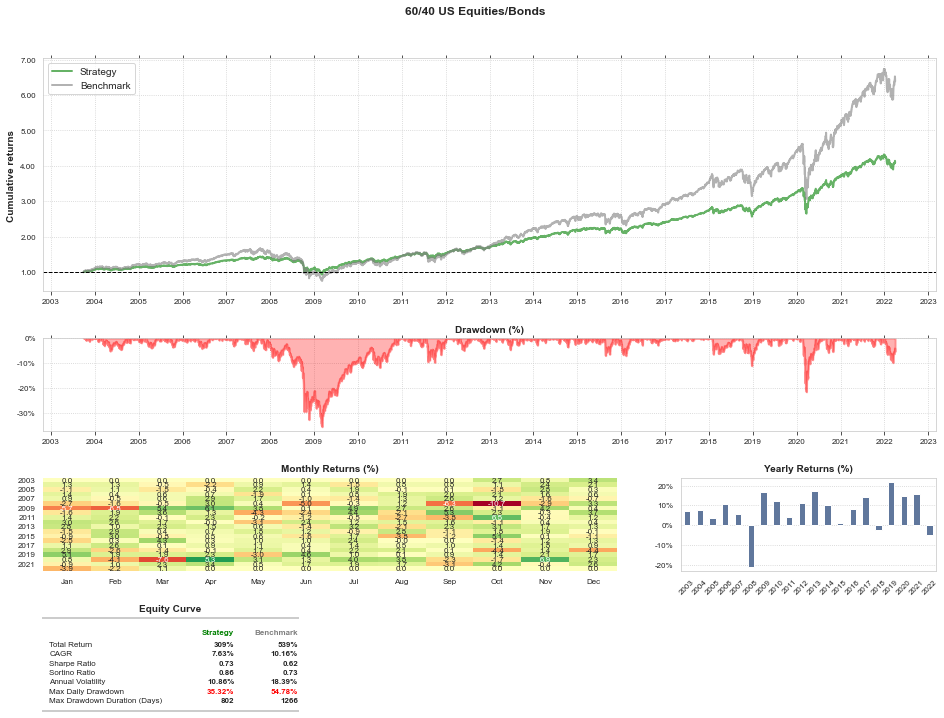

In [30]:
# Performance Output
tearsheet = TearsheetStatistics(
    strategy_equity=strategy_backtest.get_equity_curve(),
    benchmark_equity=benchmark_backtest.get_equity_curve(),
    title='60/40 US Equities/Bonds'
)
tearsheet.plot_results()